# Tarea 3 - MLP y Curvas de aprendizaje

### ITESM - Escuela de Ingeniería y Ciencias
#### Maestría en Ciencias Computacionales
#### Tópicos AI 2
##### Dr. Luis Eduardo Falcón Morales

---

## Carlos E. Hdz Rincón - A01181616

# Prerequisitos y preparamiento de ambiente

## Instalación de dependencias

Descomentamos la siguiente línea para poder instalar las dependencias de Python necesarias.

In [1]:
#!pip install keras tensorflow matplotlib numpy pandas

## Imports

In [2]:
from IPython.display import display

import time
import random

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix, classification_report

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping
import tensorflow as tf

# Connect to Google Drive if hosting the files there
#from google.colab import drive
#drive.mount('/content/drive')

## Tools

In [3]:
def print_marquee(msg: str):
    """
    Prints a centered message with a marquee of * 
    """
    marquee_width = len(msg) + 4
    print("\n")
    print("*" * marquee_width)
    print(f"* {msg} *")
    print("*" * marquee_width)

In [4]:
def train_model(model_to_fit: tf.keras.models.Model,
                epochs: int,
                train_data: tuple,
                validation_data: tuple,
                callbacks: list = None):

    t = time.process_time()
    
    trained_model = model_to_fit.fit(train_data[0],
                                     train_data[1],
                                     validation_data=validation_data,
                                     epochs=epochs,
                                     callbacks=callbacks)
    
    elapsed_time = time.process_time() - t
    
    print(f"\n\n ********* Training time: {elapsed_time} s.")
    return trained_model

def graph_loss_accuracy(h_model,
                        subtitle: str = ""):
    
    num_records = len(h_model.history["accuracy"])
    
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,num_records),h_model.history["accuracy"],label="train_acc")
    plt.plot(np.arange(0,num_records),h_model.history["val_accuracy"],label="val_acc")
    plt.title("Training and Validation Accuracy" 
              + f" ({subtitle})" if subtitle else "")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.figure()
    plt.plot(np.arange(0,num_records),h_model.history["loss"],label="train_loss") 
    plt.plot(np.arange(0,num_records),h_model.history["val_loss"],label="val_loss")
    plt.title("Training and Validation Loss" 
              + f" ({subtitle})" if subtitle else "")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

# Helper functions for reporting

def print_dataset_prediction_report(y_pred,
                                    y_real):
    
    y_pred = np.round(y_pred).astype(int)

    print_marquee(f"Classification Report")
    print(classification_report(y_real,
                                y_pred))
    
    print_marquee("Confusion Matrix")
    print(confusion_matrix(y_real,
                           y_pred))


def evaluate_model(model_to_fit: tf.keras.models.Model,
                   epochs: int,
                   train_tuple: tuple,
                   validation_tuple: tuple,
                   test_tuple: tuple = None,
                   callbacks: list = None) -> tf.keras.models.Model:

    trained_model_history = train_model(model_to_fit,
                                epochs,
                                train_tuple,
                                validation_tuple,
                                callbacks=callbacks)
    print_marquee("Model Summary")                                
    model_to_fit.summary()

    print_marquee("Validation Dataset Confusion Matrix")

    val_model_predictions = model_to_fit.predict(validation_tuple[0])
    
    print_dataset_prediction_report(val_model_predictions,
                                    validation_tuple[1])


    if test_tuple:

        print_marquee("Test Dataset Confusion Matrix")

        test_model_predictions = model_to_fit.predict(test_tuple[0])
        
        print_dataset_prediction_report(test_model_predictions,
                                        test_tuple[1])

    print_marquee("Train/Val Accuracy and Loss graphs")

    # If using early stopping, it might be the case that we used less epochs than
    #  requested
    subtitle = f"Epochs: {len(trained_model_history.history['accuracy'])}"
    
    graph_loss_accuracy(trained_model_history,
                        subtitle=subtitle)
    
    return model_to_fit, trained_model_history

# Introducción

Responder a las preguntas e incisos siguientes a partir del modelo configuración dado en el archivo de Jupyter Notebook `Tarea_3_MLP_y_curvas_de_aprendizje.ipynb`: 

* 10,000 puntos 2D de las dos lunas con ruido del 0.4 y semilla 23.
* Partición en conjuntos de entrenamiento, validación y prueba 33%/33%/33%, usando una semilla de 17. NOTA: La primera partición hazla con 66% y 33%, y la segunda al 50%. Esto te llevará a que el conjunto de entrenamiento quedará un poco mayor que los otros. 
* Como funciones de activación puedes usar ‘sigmoid’, ‘tanh’ o ‘relu’. 
* Por el momento en esta Tarea no modifiques los argumentos de compilación.
* En todas las soluciones encontradas deberás mostrar los mejores parámetros encontrados y las gráficas de las curvas de aprendizaje.


## Generación de datos

(10000, 2)
(10000, 1)


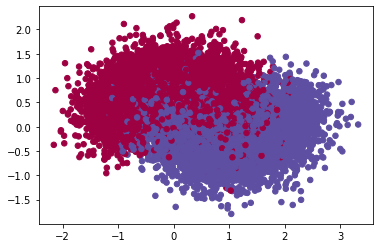

In [5]:
data = sklearn.datasets.make_moons(
    n_samples=10000,
    noise=0.4,
    random_state=23)

X, y = data
y = y.reshape(y.shape[0],1)

print(X.shape)
print(y.shape)

plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Spectral);

## Train/Val/Test split

In [6]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X,y,
                                                            train_size=0.335,
                                                            random_state=17
                                                            )        
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test,
                                                test_size=0.5,
                                                random_state=17
                                                )


print_marquee("Train")
print(X_train.shape)
print(y_train.shape)

print_marquee("Val")
print(X_val.shape)
print(y_val.shape)

print_marquee("Test")
print(X_test.shape)
print(y_test.shape)



*********
* Train *
*********
(3350, 2)
(3350, 1)


*******
* Val *
*******
(3325, 2)
(3325, 1)


********
* Test *
********
(3325, 2)
(3325, 1)


# Recuerda lo siguiente

* En promedio, el accuracy del Test no debe ser mayor que el de Validation, y el de Validation a su vez no debe ser mayor al de Train.
* No debes quedarte con un modelo en cuyas curvas de aprendizaje la de validation siempre sea mejor que la de trainining, o que a la larga quedó mejor la de validación.
* Un modelo no debe entrenarse más épocas de las necesarias.
* En promedio las curvas de aprendizaje del Train y Validation no deben de quedar demasiado separadas; dentro de lo posible, mientras más cercanas una de la otra, mejor.
* En la manera de lo posible, deberás justificar por qué los valores encontrados son los mejores posibles en cada caso. Es decir, a veces se puede encontrar el mejor valor de algún parámetro de manera aleatoria, pero depués deberás de poder justificar por qué se puede considerar efectivamente el mejor valor.
* Recuerda aplicar en todo momento el criterio de la navaja de Ockham cuando estés entre varios modelos con accuracies muy semejantes. 

# 1

Mostrar las expresiones algebraicas de las funciones de activación sigmoide, tangente hiperbólica y unidad lineal rectificadora (ReLU), así como cada una de sus gráficas.


## Sigmoide

$$\phi(z) = \frac{1}{1 + e^{-z}}$$

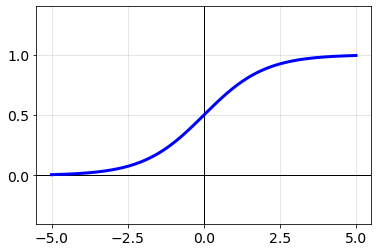

In [7]:
def plot_activation(func, yaxis=(-1.4, 1.4)):

    x = np.arange(-5, 5, 0.01)

    plt.ylim(yaxis)
    plt.locator_params(nbins=5)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.axhline(lw=1, c='black')
    plt.axvline(lw=1, c='black')
    plt.grid(alpha=0.4, ls='-')

    plt.plot(x, func(x), c='b', lw=3)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plot_activation(sigmoid, yaxis=(-0.4, 1.4))

## Tangente hiperbólica

$$ tanh(x) = \frac{2}{1 + e^{-2x}} - 1$$

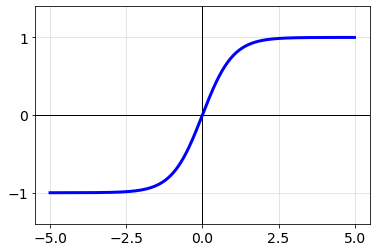

In [8]:
def tanh(x):
    return 2 / (1 + np.exp(-2 * x)) -1

plot_activation(tanh)

## ReLU

$$ R(z) = max(0, z) $$

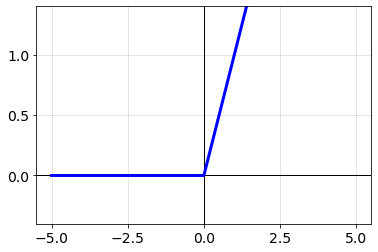

In [9]:
def relu(x):
    return np.maximum(x, 0)

plot_activation(relu, yaxis=(-0.4, 1.4))

# 2

En esta primera red usa solamente el modelo del perceptrón simple, es decir, una red con su capa de entrada de 2 neuronas, la capa de salida con 1 neurona y sin capa oculta.

Encuentra el mejor modelo modificando solamente en este caso el número de épocas y la función de activación. Recuerda respaldar tu resultado con las curvas de aprendizaje.

---

Para este ejercicio se utilizará EarlyStopping con una tolerancia de 3 monitoreando el `val_loss` para determinar ela mejor cantidad de epochs donde el modelo no empieza a hacer overfitting ni hace más mejoras al resultado.



****************************************************************
* *************** Activation Function: tanh ****************** *
****************************************************************
Epoch 1/200
105/105 [==============================] - 1s 4ms/step - loss: 7.1695 - accuracy: 0.2372 - val_loss: 7.0874 - val_accuracy: 0.2574
Epoch 2/200
105/105 [==============================] - 0s 2ms/step - loss: 7.1356 - accuracy: 0.2405 - val_loss: 7.0405 - val_accuracy: 0.2641
Epoch 3/200
105/105 [==============================] - 0s 2ms/step - loss: 7.1405 - accuracy: 0.2580 - val_loss: 6.9848 - val_accuracy: 0.2713
Epoch 4/200
105/105 [==============================] - 0s 2ms/step - loss: 7.2021 - accuracy: 0.2603 - val_loss: 6.9260 - val_accuracy: 0.2851
Epoch 5/200
105/105 [==============================] - 0s 2ms/step - loss: 7.0002 - accuracy: 0.2713 - val_loss: 6.8505 - val_accuracy: 0.3005
Epoch 6/200
105/105 [==============================] - 0s 2ms/step - loss: 7.0971 - accu

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


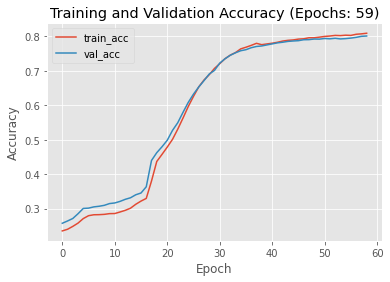

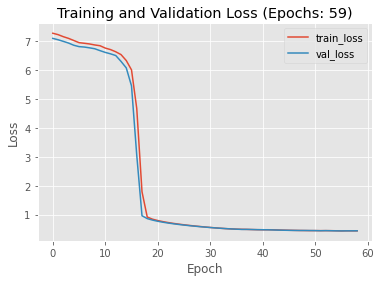



*******************************************************************
* *************** Activation Function: sigmoid ****************** *
*******************************************************************
Epoch 1/200
105/105 [==============================] - 1s 4ms/step - loss: 0.7481 - accuracy: 0.5519 - val_loss: 0.7267 - val_accuracy: 0.5624
Epoch 2/200
105/105 [==============================] - 0s 2ms/step - loss: 0.7108 - accuracy: 0.5586 - val_loss: 0.6929 - val_accuracy: 0.5768
Epoch 3/200
105/105 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5932 - val_loss: 0.6635 - val_accuracy: 0.5910
Epoch 4/200
105/105 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.5993 - val_loss: 0.6378 - val_accuracy: 0.6066
Epoch 5/200
105/105 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.6179 - val_loss: 0.6158 - val_accuracy: 0.6226
Epoch 6/200
105/105 [==============================] - 0s 2ms/step - loss: 0.59

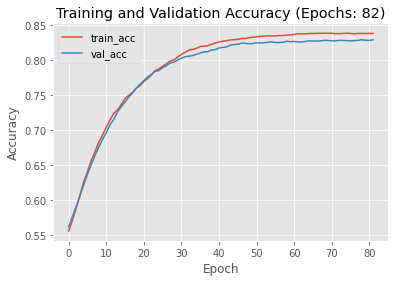

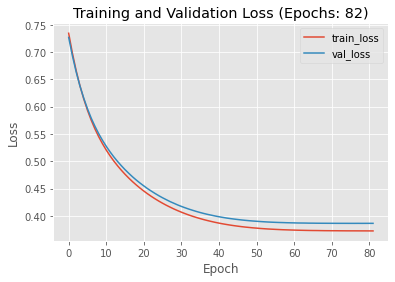



****************************************************************
* *************** Activation Function: relu ****************** *
****************************************************************
Epoch 1/200
105/105 [==============================] - 1s 3ms/step - loss: 6.1752 - accuracy: 0.5052 - val_loss: 5.5471 - val_accuracy: 0.4908
Epoch 2/200
105/105 [==============================] - 0s 2ms/step - loss: 5.5114 - accuracy: 0.4813 - val_loss: 4.6313 - val_accuracy: 0.4884
Epoch 3/200
105/105 [==============================] - 0s 2ms/step - loss: 4.4740 - accuracy: 0.4658 - val_loss: 3.1541 - val_accuracy: 0.4989
Epoch 4/200
105/105 [==============================] - 0s 2ms/step - loss: 2.6036 - accuracy: 0.4976 - val_loss: 1.9779 - val_accuracy: 0.5035
Epoch 5/200
105/105 [==============================] - 0s 2ms/step - loss: 1.7270 - accuracy: 0.4928 - val_loss: 1.2162 - val_accuracy: 0.5053
Epoch 6/200
105/105 [==============================] - 0s 2ms/step - loss: 1.1814 - accu

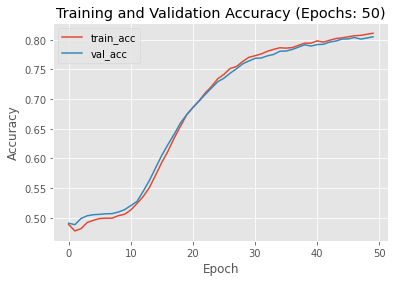

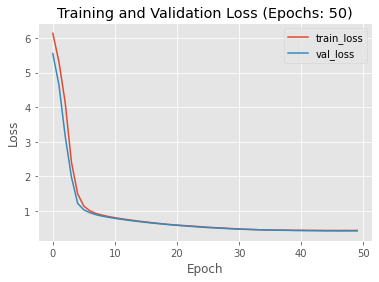

In [11]:
for act_fun in ["tanh", "sigmoid", "relu"]:

    print_marquee(f"*************** Activation Function: {act_fun} ******************")

    model_2 = Sequential(name=f"model_2-{act_fun}")

    model_2.add(Dense(units=1,
                    input_dim=2,
                    activation=act_fun))

    model_2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

    evaluate_model(model_2,
                epochs=200,
                train_tuple=(X_train, y_train),
                validation_tuple=(X_val, y_val),
                test_tuple = (X_test, y_test),
                callbacks=[EarlyStopping(monitor='val_loss',
                                         mode='min',
                                         verbose=1,
                                         patience=3)])

---
## Observaciones

* ¿Cuántos parámetros (pesos) en total tiene tu modelo?
    * Total params: 3
    * Trainable params: 3
    * Non-trainable params: 0
* ¿Cuáles son los valores del accuracy de los conjuntos de Train, Validación y Test de tu mejor modelo?

&nbsp;|tanh|sigmoid|relu
---|:---:|:---:|:---:
Epochs|59|82|50
Train|0.8128|0.8339|0.8145
Val|0.80|0.8295|0.8051
Test|0.80|0.82|0.80

Se consiguieron resultados muy similares en el accuracy en validation y en test sets para `tanh` y `relu`, pero `sigmoid` consiguió un mejor accuracy. Esto puede deberse a que `sigmoid` es una función ideal para una clasificación binaria, en los siguientes ejercicios se ajustarán las funciones de activación en las capas ocultas, pero se dejará la función de activación de la capa de salida como sigmoide.

# 3

En este ejercicio deberás proponer la mejor red neuronal multicapa (MLP) modificando solamente el número de capas ocultas, el número de neuronas en dichas capas ocultas, el total de épocas y las funciones de activación.

---

Ya que este ejercicio se trata de una clasificación binaria, la capa de salida
siempre usará la función sigmoide para poder clasificar entre 0 ó 1. Las capas ocultas sí verán sus funciones de activación variadas.



****************************************************************
* *************** Activation Function: tanh ****************** *
****************************************************************
Epoch 1/200
105/105 [==============================] - 1s 5ms/step - loss: 0.6031 - accuracy: 0.7526 - val_loss: 0.5126 - val_accuracy: 0.7603
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4834 - accuracy: 0.7718 - val_loss: 0.4353 - val_accuracy: 0.8048
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4110 - accuracy: 0.8309 - val_loss: 0.4068 - val_accuracy: 0.8280
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.8300 - val_loss: 0.4043 - val_accuracy: 0.8307
Epoch 5/200
105/105 [==============================] - 0s 3ms/step - loss: 0.3839 - accuracy: 0.8431 - val_loss: 0.4026 - val_accuracy: 0.8319
Epoch 6/200
105/105 [==============================] - 0s 3ms/step - loss: 0.3838 - accu

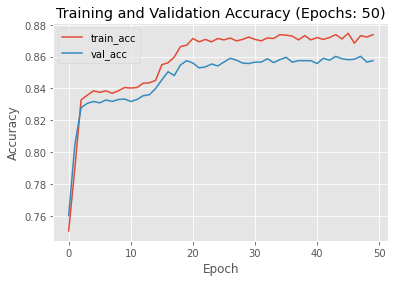

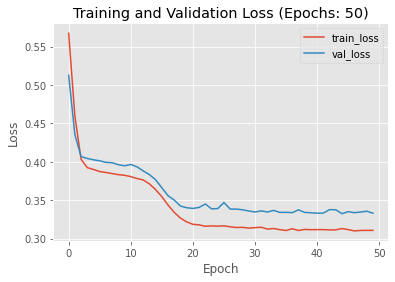



*******************************************************************
* *************** Activation Function: sigmoid ****************** *
*******************************************************************
Epoch 1/200
105/105 [==============================] - 1s 6ms/step - loss: 0.7036 - accuracy: 0.5074 - val_loss: 0.6931 - val_accuracy: 0.5059
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4854 - val_loss: 0.6929 - val_accuracy: 0.5059
Epoch 3/200
105/105 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5017 - val_loss: 0.6928 - val_accuracy: 0.5059
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5593 - val_loss: 0.6926 - val_accuracy: 0.5059
Epoch 5/200
105/105 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5234 - val_loss: 0.6925 - val_accuracy: 0.4941
Epoch 6/200
105/105 [==============================] - 0s 4ms/step - loss: 0.69

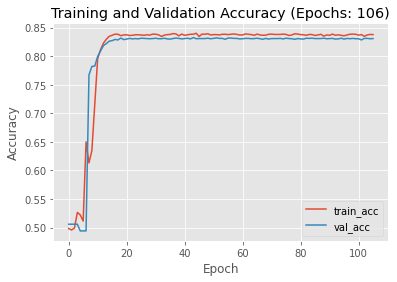

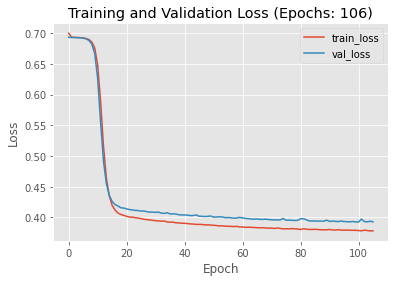



****************************************************************
* *************** Activation Function: relu ****************** *
****************************************************************
Epoch 1/200
105/105 [==============================] - 1s 5ms/step - loss: 0.6926 - accuracy: 0.5205 - val_loss: 0.6880 - val_accuracy: 0.5723
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5824 - val_loss: 0.6700 - val_accuracy: 0.6286
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.6524 - val_loss: 0.6371 - val_accuracy: 0.6586
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.6814 - val_loss: 0.6042 - val_accuracy: 0.6899
Epoch 5/200
105/105 [==============================] - 0s 3ms/step - loss: 0.5803 - accuracy: 0.7067 - val_loss: 0.5733 - val_accuracy: 0.7170
Epoch 6/200
105/105 [==============================] - 0s 3ms/step - loss: 0.5534 - accu

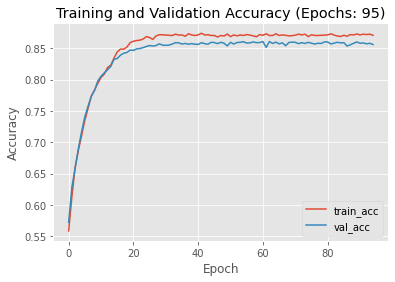

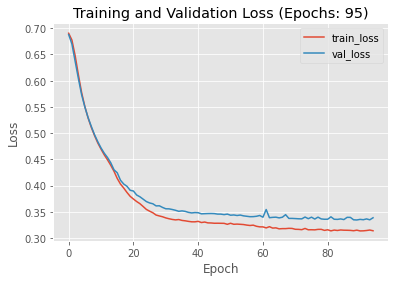

CPU times: user 1min 36s, sys: 6.22 s, total: 1min 42s
Wall time: 1min 31s


In [ ]:
%%time

for act_fun in ["tanh", "sigmoid", "relu"]:

    print_marquee(f"*************** Activation Function: {act_fun} ******************")

    model_3 = Sequential(name=f"model_3-{act_fun}")

    model_3.add(Dense(units=2,
                      input_dim=2,
                      activation=act_fun))
    
    model_3.add(Dense(units=4,
                      activation=act_fun))
    
    model_3.add(Dense(units=6,
                      activation=act_fun))
    
    model_3.add(Dense(units=8,
                      activation=act_fun))
    
    model_3.add(Dense(units=6,
                      activation=act_fun))

    model_3.add(Dense(units=1,
                      activation="sigmoid"))

    model_3.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

    evaluate_model(model_3,
                   epochs=200,
                   train_tuple=(X_train, y_train),
                   validation_tuple=(X_val, y_val),
                   test_tuple = (X_test, y_test),
                   callbacks=[EarlyStopping(monitor='val_loss',
                                            mode='min',
                                            verbose=1,
                                            patience=5)])

---
## Observaciones

&nbsp;|tanh|sigmoid|relu
---|:---:|:---:|:---:
Epochs|50|106|95
Train|0.8769|0.8403|0.8741
Val|0.8574|0.8307|0.8559
Test|0.85|0.82|0.84

Dados estos resultados es `tanh` el mejor modelo ya que presentó un mejor accuracy en sus tres fases además de haber requerido sólo 50 epochs de entrenamiento.

1. ¿Cuántas capas ocultas estás encontrando en tu mejor modelo?
    * 4 capas ocultas
1. ¿Cuántas neuronas en la capa o capas ocultas tiene tu mejor modelo?
    1. 4
    1. 6
    1. 8
    1. 6
    * Para un total de 24 neuronas en la capa oculta
1. ¿Cuántos parámetros (pesos) tiene tu mejor modelo?
    * Total params: 165
    * Trainable params: 165
    * Non-trainable params: 0
1. ¿Cuál es el mejor valor para el número de épocas en tu mejor modelo?
    * 50 epochs
1. ¿Cuáles son las funciones de activación de tu mejor modelo?
    * tanh
1. ¿Cuáles son los valores del accuracy de los conjuntos de Train, Validación y Test de tu mejor modelo de este caso?

&nbsp;|tanh
---|:---:
Epochs|50
Train|0.8769
Val|0.8574
Test|0.85



# 4

En este inciso deberás aplicar alguno de los criterios de regularización *l1, l2 o l1_l2* (pero solamente uno de estos 3).

En este ejercicio usarás el caso "activity_regularizer". Deberás también determinar el valor de la o las constantes de penalización. Igualmente determina los mejores valores para el número de capas ocultas, neuronas, funciones de activación y épocas.

---

Al igual que en el ejercicio anterior, a que este ejercicio se trata de una clasificación binaria, la capa de salida siempre usará la función sigmoide para poder clasificar entre 0 ó 1. Las capas ocultas sí verán sus funciones de activación variadas.

## L1 and L2



********************************************************************************************************************************
* *************** Activation Function: tanh - Reg: <class 'tensorflow.python.keras.regularizers.L1'>: 0.001 ****************** *
********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 2s 6ms/step - loss: 0.6640 - accuracy: 0.5973 - val_loss: 0.5334 - val_accuracy: 0.7453
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.7661 - val_loss: 0.4209 - val_accuracy: 0.8292
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8336 - val_loss: 0.4017 - val_accuracy: 0.8331
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.3729 - accuracy: 0.8452 - val_loss: 0.3901 - val_accuracy: 0.8370
Epoch 5/200
105/105 [==================

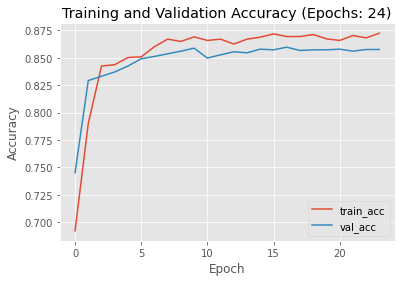

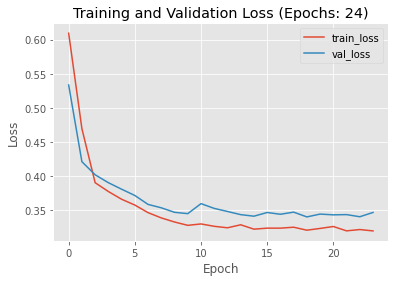



********************************************************************************************************************************
* *************** Activation Function: tanh - Reg: <class 'tensorflow.python.keras.regularizers.L1'>: 0.003 ****************** *
********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 1s 6ms/step - loss: 0.6891 - accuracy: 0.5573 - val_loss: 0.4754 - val_accuracy: 0.8205
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4451 - accuracy: 0.8377 - val_loss: 0.4399 - val_accuracy: 0.8289
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4141 - accuracy: 0.8441 - val_loss: 0.4311 - val_accuracy: 0.8313
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.8256 - val_loss: 0.4259 - val_accuracy: 0.8307
Epoch 5/200
105/105 [==================

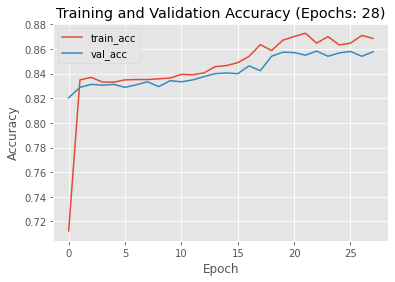

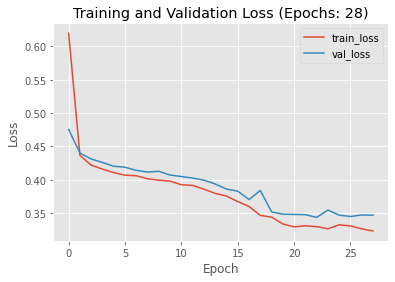



********************************************************************************************************************************
* *************** Activation Function: tanh - Reg: <class 'tensorflow.python.keras.regularizers.L1'>: 0.009 ****************** *
********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 2s 6ms/step - loss: 0.7638 - accuracy: 0.4716 - val_loss: 0.5784 - val_accuracy: 0.7798
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.5403 - accuracy: 0.8046 - val_loss: 0.4830 - val_accuracy: 0.8331
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4688 - accuracy: 0.8361 - val_loss: 0.4596 - val_accuracy: 0.8355
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4598 - accuracy: 0.8273 - val_loss: 0.4456 - val_accuracy: 0.8391
Epoch 5/200
105/105 [==================

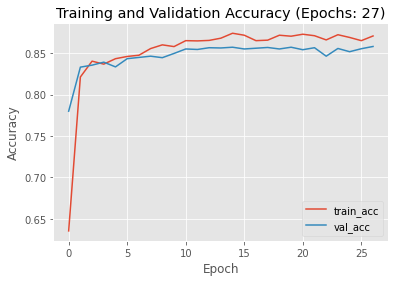

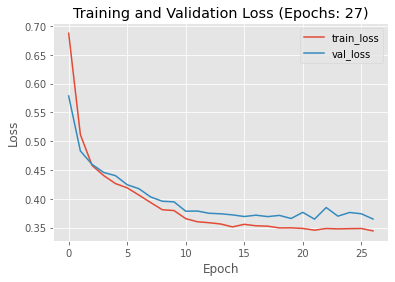



********************************************************************************************************************************
* *************** Activation Function: tanh - Reg: <class 'tensorflow.python.keras.regularizers.L2'>: 0.001 ****************** *
********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 2s 6ms/step - loss: 0.6197 - accuracy: 0.7247 - val_loss: 0.4555 - val_accuracy: 0.8247
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4477 - accuracy: 0.8220 - val_loss: 0.4214 - val_accuracy: 0.8319
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4183 - accuracy: 0.8295 - val_loss: 0.4153 - val_accuracy: 0.8307
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4044 - accuracy: 0.8330 - val_loss: 0.4104 - val_accuracy: 0.8313
Epoch 5/200
105/105 [==================

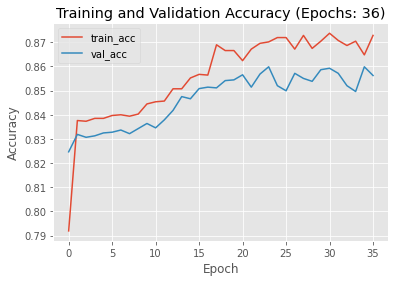

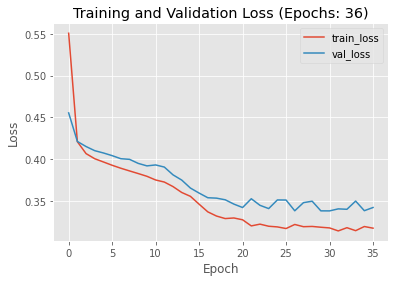



********************************************************************************************************************************
* *************** Activation Function: tanh - Reg: <class 'tensorflow.python.keras.regularizers.L2'>: 0.003 ****************** *
********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 2s 6ms/step - loss: 0.5857 - accuracy: 0.8397 - val_loss: 0.4719 - val_accuracy: 0.8235
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4456 - accuracy: 0.8368 - val_loss: 0.4362 - val_accuracy: 0.8307
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4210 - accuracy: 0.8383 - val_loss: 0.4252 - val_accuracy: 0.8328
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4148 - accuracy: 0.8334 - val_loss: 0.4189 - val_accuracy: 0.8334
Epoch 5/200
105/105 [==================

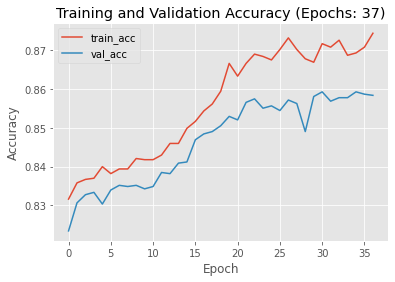

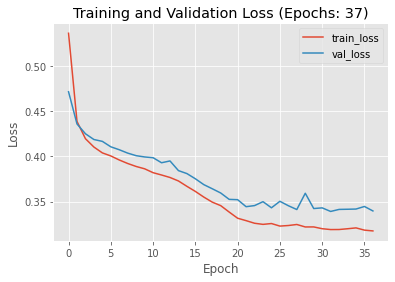



********************************************************************************************************************************
* *************** Activation Function: tanh - Reg: <class 'tensorflow.python.keras.regularizers.L2'>: 0.009 ****************** *
********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 2s 6ms/step - loss: 0.7016 - accuracy: 0.5872 - val_loss: 0.5584 - val_accuracy: 0.8208
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.5006 - accuracy: 0.8332 - val_loss: 0.4551 - val_accuracy: 0.8289
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.8473 - val_loss: 0.4431 - val_accuracy: 0.8295
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4200 - accuracy: 0.8487 - val_loss: 0.4307 - val_accuracy: 0.8364
Epoch 5/200
105/105 [==================

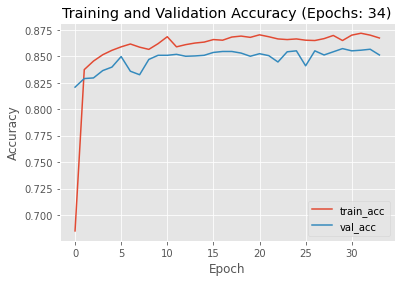

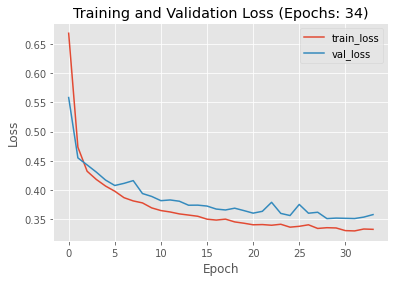



***********************************************************************************************************************************
* *************** Activation Function: sigmoid - Reg: <class 'tensorflow.python.keras.regularizers.L1'>: 0.001 ****************** *
***********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 2s 6ms/step - loss: 0.7218 - accuracy: 0.5119 - val_loss: 0.7115 - val_accuracy: 0.4941
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.5102 - val_loss: 0.7086 - val_accuracy: 0.4941
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.4920 - val_loss: 0.7076 - val_accuracy: 0.4941
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.7072 - accuracy: 0.4981 - val_loss: 0.7066 - val_accuracy: 0.4941
Epoch 5/200
105/105 [=========

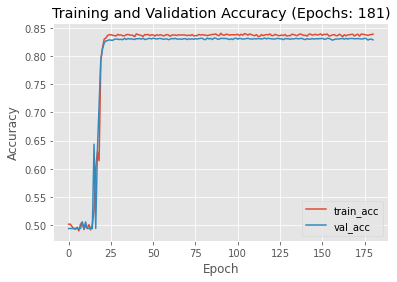

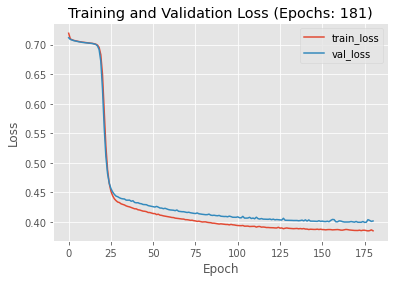



***********************************************************************************************************************************
* *************** Activation Function: sigmoid - Reg: <class 'tensorflow.python.keras.regularizers.L1'>: 0.003 ****************** *
***********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 2s 6ms/step - loss: 0.7607 - accuracy: 0.4872 - val_loss: 0.7421 - val_accuracy: 0.5059
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.7407 - accuracy: 0.5007 - val_loss: 0.7361 - val_accuracy: 0.5059
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.7351 - accuracy: 0.5001 - val_loss: 0.7320 - val_accuracy: 0.4941
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.7312 - accuracy: 0.5017 - val_loss: 0.7288 - val_accuracy: 0.4941
Epoch 5/200
105/105 [=========

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


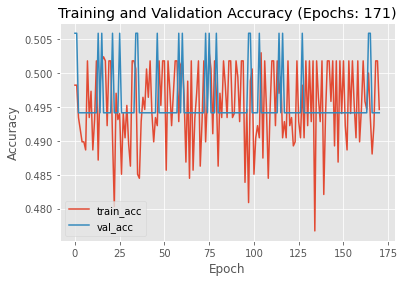

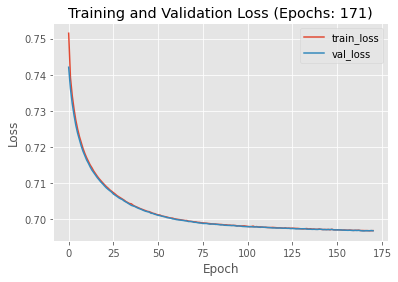



***********************************************************************************************************************************
* *************** Activation Function: sigmoid - Reg: <class 'tensorflow.python.keras.regularizers.L1'>: 0.009 ****************** *
***********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 2s 6ms/step - loss: 0.9920 - accuracy: 0.4982 - val_loss: 0.8939 - val_accuracy: 0.5059
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.8786 - accuracy: 0.5025 - val_loss: 0.8397 - val_accuracy: 0.5059
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.8362 - accuracy: 0.4945 - val_loss: 0.8156 - val_accuracy: 0.5059
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.8126 - accuracy: 0.5009 - val_loss: 0.8021 - val_accuracy: 0.5059
Epoch 5/200
105/105 [=========

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


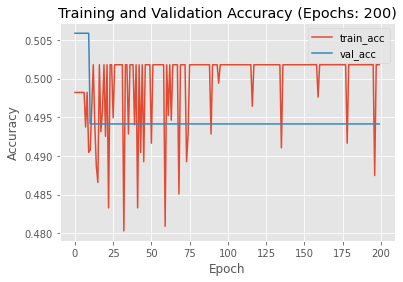

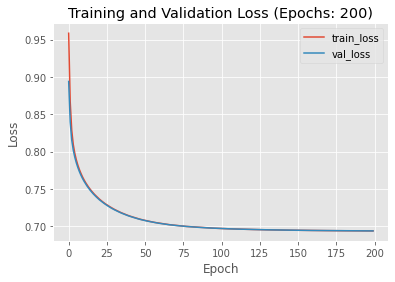



***********************************************************************************************************************************
* *************** Activation Function: sigmoid - Reg: <class 'tensorflow.python.keras.regularizers.L2'>: 0.001 ****************** *
***********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 2s 6ms/step - loss: 0.8320 - accuracy: 0.4976 - val_loss: 0.7623 - val_accuracy: 0.4941
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.7431 - accuracy: 0.5047 - val_loss: 0.7237 - val_accuracy: 0.4941
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.7145 - accuracy: 0.5072 - val_loss: 0.7097 - val_accuracy: 0.4941
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.5130 - val_loss: 0.7040 - val_accuracy: 0.4941
Epoch 5/200
105/105 [=========

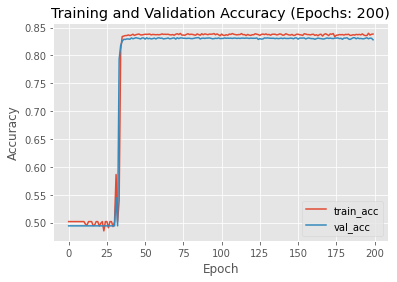

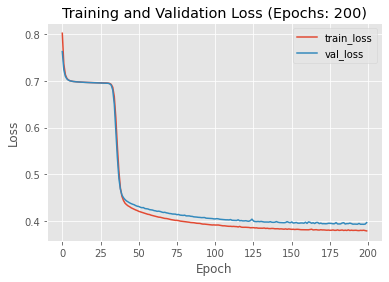



***********************************************************************************************************************************
* *************** Activation Function: sigmoid - Reg: <class 'tensorflow.python.keras.regularizers.L2'>: 0.003 ****************** *
***********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 2s 6ms/step - loss: 0.7736 - accuracy: 0.4978 - val_loss: 0.7292 - val_accuracy: 0.5059
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.7257 - accuracy: 0.5015 - val_loss: 0.7151 - val_accuracy: 0.5059
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.7145 - accuracy: 0.4999 - val_loss: 0.7106 - val_accuracy: 0.5059
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.7102 - accuracy: 0.5031 - val_loss: 0.7083 - val_accuracy: 0.5059
Epoch 5/200
105/105 [=========

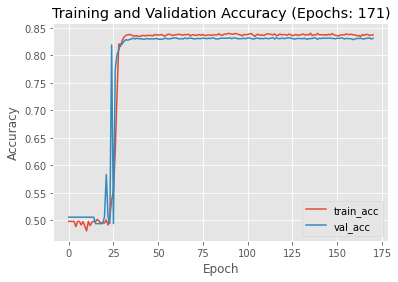

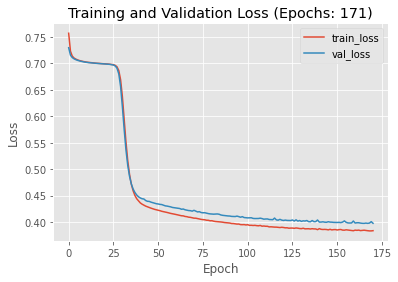



***********************************************************************************************************************************
* *************** Activation Function: sigmoid - Reg: <class 'tensorflow.python.keras.regularizers.L2'>: 0.009 ****************** *
***********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 2s 9ms/step - loss: 0.8058 - accuracy: 0.4965 - val_loss: 0.7675 - val_accuracy: 0.4941
Epoch 2/200
105/105 [==============================] - 0s 4ms/step - loss: 0.7627 - accuracy: 0.4946 - val_loss: 0.7506 - val_accuracy: 0.4941
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.7478 - accuracy: 0.4970 - val_loss: 0.7409 - val_accuracy: 0.4941
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.7389 - accuracy: 0.5000 - val_loss: 0.7340 - val_accuracy: 0.4941
Epoch 5/200
105/105 [=========

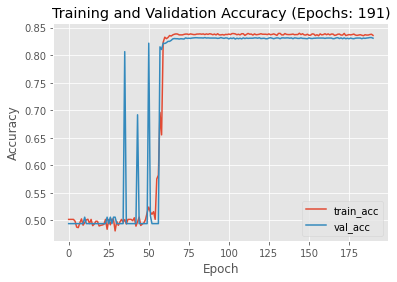

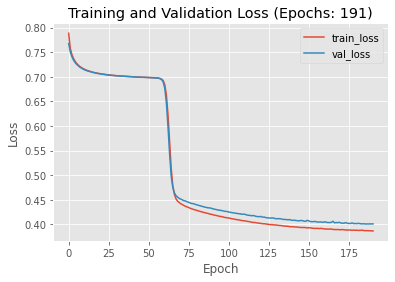



********************************************************************************************************************************
* *************** Activation Function: relu - Reg: <class 'tensorflow.python.keras.regularizers.L1'>: 0.001 ****************** *
********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 2s 6ms/step - loss: 0.6934 - accuracy: 0.5081 - val_loss: 0.6933 - val_accuracy: 0.4941
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5079 - val_loss: 0.6932 - val_accuracy: 0.4941
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6932 - val_accuracy: 0.4941
Epoch 4/200
105/105 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5211 - val_loss: 0.6932 - val_accuracy: 0.4941
Epoch 5/200
105/105 [==================

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


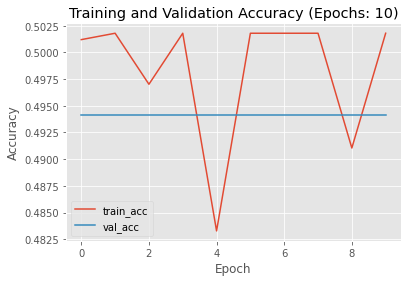

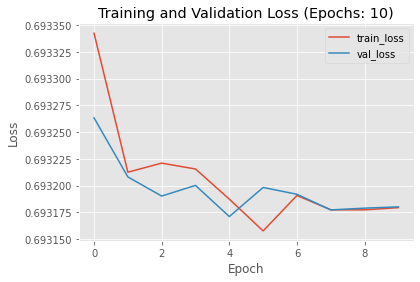



********************************************************************************************************************************
* *************** Activation Function: relu - Reg: <class 'tensorflow.python.keras.regularizers.L1'>: 0.003 ****************** *
********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 2s 6ms/step - loss: 0.6947 - accuracy: 0.6976 - val_loss: 0.6750 - val_accuracy: 0.7353
Epoch 2/200
105/105 [==============================] - 0s 4ms/step - loss: 0.6406 - accuracy: 0.7558 - val_loss: 0.5738 - val_accuracy: 0.7916
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.5586 - accuracy: 0.8032 - val_loss: 0.5407 - val_accuracy: 0.8132
Epoch 4/200
105/105 [==============================] - 0s 4ms/step - loss: 0.5204 - accuracy: 0.8297 - val_loss: 0.5220 - val_accuracy: 0.8232
Epoch 5/200
105/105 [==================

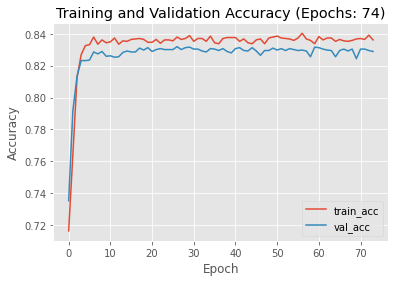

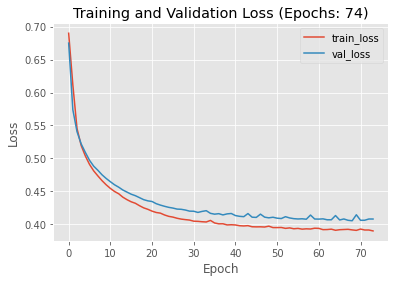



********************************************************************************************************************************
* *************** Activation Function: relu - Reg: <class 'tensorflow.python.keras.regularizers.L1'>: 0.009 ****************** *
********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 2s 6ms/step - loss: 0.7034 - accuracy: 0.4968 - val_loss: 0.6948 - val_accuracy: 0.4941
Epoch 2/200
105/105 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.6257 - val_loss: 0.6712 - val_accuracy: 0.6947
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.7367 - val_loss: 0.5894 - val_accuracy: 0.7738
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.5171 - accuracy: 0.8166 - val_loss: 0.4622 - val_accuracy: 0.8310
Epoch 5/200
105/105 [==================

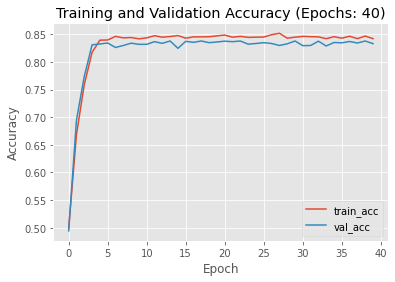

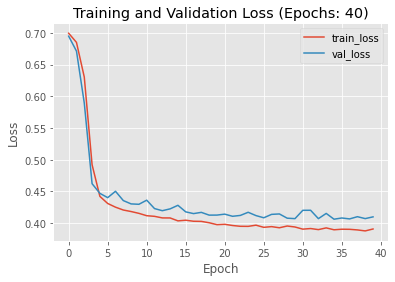



********************************************************************************************************************************
* *************** Activation Function: relu - Reg: <class 'tensorflow.python.keras.regularizers.L2'>: 0.001 ****************** *
********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 2s 6ms/step - loss: 0.6547 - accuracy: 0.6570 - val_loss: 0.5717 - val_accuracy: 0.7266
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.5500 - accuracy: 0.7621 - val_loss: 0.5354 - val_accuracy: 0.7543
Epoch 3/200
105/105 [==============================] - 0s 4ms/step - loss: 0.5302 - accuracy: 0.7532 - val_loss: 0.5067 - val_accuracy: 0.7696
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.7860 - val_loss: 0.4826 - val_accuracy: 0.7883
Epoch 5/200
105/105 [==================

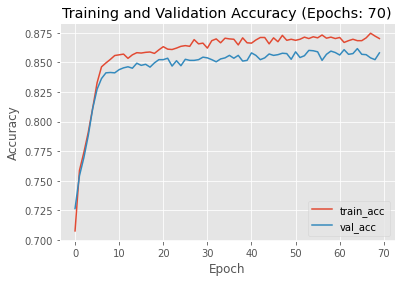

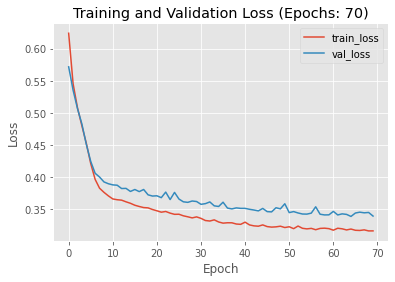



********************************************************************************************************************************
* *************** Activation Function: relu - Reg: <class 'tensorflow.python.keras.regularizers.L2'>: 0.003 ****************** *
********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 2s 6ms/step - loss: 0.6960 - accuracy: 0.4964 - val_loss: 0.6941 - val_accuracy: 0.5059
Epoch 2/200
105/105 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.4860 - val_loss: 0.6935 - val_accuracy: 0.4941
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4894 - val_loss: 0.6933 - val_accuracy: 0.4941
Epoch 4/200
105/105 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5098 - val_loss: 0.6933 - val_accuracy: 0.4941
Epoch 5/200
105/105 [==================

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


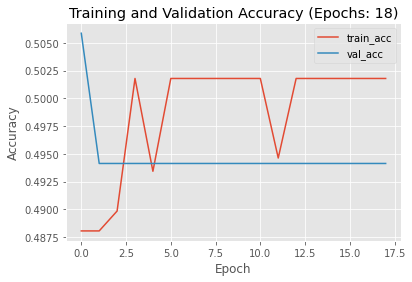

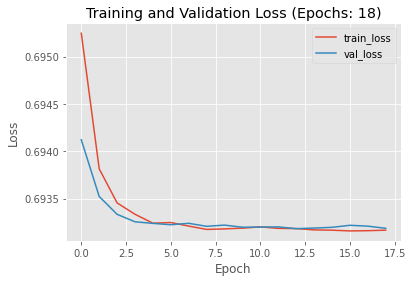



********************************************************************************************************************************
* *************** Activation Function: relu - Reg: <class 'tensorflow.python.keras.regularizers.L2'>: 0.009 ****************** *
********************************************************************************************************************************
Epoch 1/200
105/105 [==============================] - 2s 6ms/step - loss: 0.6650 - accuracy: 0.6457 - val_loss: 0.5921 - val_accuracy: 0.8241
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.8395 - val_loss: 0.5501 - val_accuracy: 0.8316
Epoch 3/200
105/105 [==============================] - 0s 4ms/step - loss: 0.5320 - accuracy: 0.8393 - val_loss: 0.5010 - val_accuracy: 0.8286
Epoch 4/200
105/105 [==============================] - 0s 4ms/step - loss: 0.4749 - accuracy: 0.8396 - val_loss: 0.4564 - val_accuracy: 0.8310
Epoch 5/200
105/105 [==================

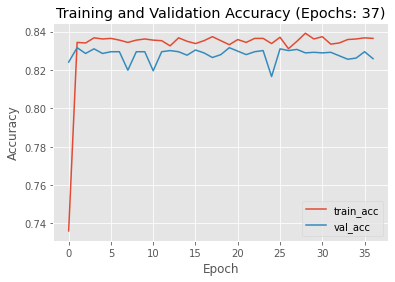

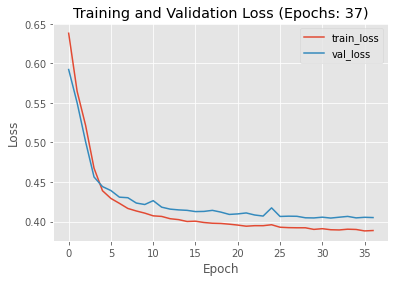

CPU times: user 10min 26s, sys: 35.9 s, total: 11min 2s
Wall time: 10min 5s


In [ ]:
%%time

model_4_results = pd.DataFrame(columns=[
                                        "act_fun",
                                        "train_acc",
                                        "val_acc",
                                        "test_acc",
                                        "regularizer",
                                        "reg_val"
                               ])

for act_fun in ["tanh", "sigmoid", "relu"]:

    for regularizer in [regularizers.l1, regularizers.l2]:

        for reg_val in [0.001, 0.003, 0.009]:

            reg = regularizer(reg_val)

            print_marquee(f"*************** Activation Function: {act_fun} - Reg: {regularizer}: {reg_val} ******************")

            model_4 = Sequential(name=f"model_4-{act_fun}")

            model_4.add(Dense(units=2,
                            input_dim=2,
                            activation=act_fun))
            
            model_4.add(Dense(units=4,
                            activation=act_fun,
                            activity_regularizer=reg))
            
            model_4.add(Dense(units=6,
                            activation=act_fun,
                            activity_regularizer=reg))
            
            model_4.add(Dense(units=8,
                            activation=act_fun,
                            activity_regularizer=reg))
            
            model_4.add(Dense(units=8,
                            activation=act_fun,
                            activity_regularizer=reg))
            
            model_4.add(Dense(units=6,
                            activation=act_fun,
                            activity_regularizer=reg))
            
            model_4.add(Dense(units=4,
                            activation=act_fun,
                            activity_regularizer=reg))

            model_4.add(Dense(units=1,
                            activation="sigmoid"))

            model_4.compile(optimizer='adam',
                            loss='binary_crossentropy',
                            metrics=['accuracy'])

            evaluate_model(model_4,
                        epochs=200,
                        train_tuple=(X_train, y_train),
                        validation_tuple=(X_val, y_val),
                        test_tuple = (X_test, y_test),
                        callbacks=[EarlyStopping(monitor='val_loss',
                                                    mode='min',
                                                    verbose=1,
                                                    patience=5)])
            


## L1L2

In [ ]:
%%time

reg_values = [0.001, 0.003, 0.009]

for act_fun in ["tanh", "sigmoid", "relu"]:

        for l1_val in reg_values:

            for l2_val in reg_values:

                reg = regularizers.l1_l2(l1_val, l2_val)

                print_marquee(f"*************** Activation Function: {act_fun} - L1L2 {l1_val}/{l2_val} ******************")

                model_4 = Sequential(name=f"model_4-{act_fun}")

                model_4.add(Dense(units=2,
                                input_dim=2,
                                activation=act_fun))
                
                model_4.add(Dense(units=4,
                                activation=act_fun,
                                activity_regularizer=reg))
                
                model_4.add(Dense(units=6,
                                activation=act_fun,
                                activity_regularizer=reg))
                
                model_4.add(Dense(units=8,
                                activation=act_fun,
                                activity_regularizer=reg))
                
                model_4.add(Dense(units=8,
                                activation=act_fun,
                                activity_regularizer=reg))
                
                model_4.add(Dense(units=6,
                                activation=act_fun,
                                activity_regularizer=reg))
                
                model_4.add(Dense(units=4,
                                activation=act_fun,
                                activity_regularizer=reg))

                model_4.add(Dense(units=1,
                                activation="sigmoid"))

                model_4.compile(optimizer='adam',
                                loss='binary_crossentropy',
                                metrics=['accuracy'])

                evaluate_model(model_4,
                            epochs=200,
                            train_tuple=(X_train, y_train),
                            validation_tuple=(X_val, y_val),
                            test_tuple = (X_test, y_test),
                            callbacks=[EarlyStopping(monitor='val_loss',
                                                        mode='min',
                                                        verbose=1,
                                                        patience=5)])
            


Output hidden; open in https://colab.research.google.com to view.

---
## Observaciones

Se puede apreciar que la regularización tiene un impacto positivo a medida que se aumenta el tamaño de la red neuronal, sin embargo, hay algunos modelos con función de activación sigmoide o ReLU donde su entrenamiento fue completamente saboteado por la regularización dando un accuracy de alrededor de 50%, que no es mejor que una clasificación aleatoria (un volado).

En comparación con el modelo sin regularización (que también poseía una arquitectura más sencilla), no se aprecia una mejora, significativa, de hecho, dados los tiempos de entrenamiento y los parámetros a entrenar, se puede apreciar que un modelo más complejo con regularización es más costoso que uno más sencillo que sin regularización.


1. Aunque en este ejercicio estaremos usando solamente el caso "activity" para el argumento de la regularización, ¿cuál es la diferencia de aplicar alguno de los otros 2 criterios de regularización: "kernel_regularizer" y "bias_regularizer"? NOTA: consulta la documentación de Keras: https://keras.io/api/layers/regularizers/.
    * kernel_regularizer: Se penaliza en kernel de la capa.
    * bias_regularizer: Se penaliza en el sesgo (bias) de la capa.
    * activity_regularizer: Se penaliza en la salida de la capa.

1. ¿Cuál es el mejor criterio de regularización (l1,l2 o l1_l2) y su constante de penalización encontrado?
    * Usando `tanh` se puede apreciar que regularización `L2=0.001` tuvo una ligera ventaja, aunque L1 también obtuvo para esa función de activación un accuracy similar.
1. ¿Cuántas capas ocultas y neuronas tiene tu mejor modelo?
    1. 2
    1. 4
    1. 6
    1. 8
    1. 8
    1. 6
    1. 4
    1. 1
    * Seis capas ocultas y 39 neuronas en total

1. ¿Cuántos parámetros (pesos) tiene tu mejor modelo?
    * Total params: 263
    * Trainable params: 263
    * Non-trainable params: 0
1. Indica las funciones de activación y épocas utilizadas en tu mejor modelo.
    * `tanh` con 36 epochs y regularizacion L2
1. ¿Cuáles son los valores del accuracy de los conjuntos de Train, Validación y Test de tu mejor modelo de este caso?

&nbsp;|tanh
---|:---:
Epochs|36
Train|0.8776
Val|0.86
Test|0.84
Reg|L2=0.001

# 5

Realiza un resumen con base a los modelos encontrados. Suponiendo que tuvieras que decidirte por uno de los modelos anteriores, ¿con cuál de ellos te quedarías como modelo final? Justifica tu respuesta.

---

Para este problema con la siguiente arquitectura:

## Model Summary -"model_3-tanh"

Layer (type)|Output Shape|Param 
:---|:---|:---
dense_179 (Dense)|(None, 2)|6
dense_180 (Dense)|(None, 4)|12
dense_181 (Dense)|(None, 6)|30
dense_182 (Dense)|(None, 8)|56
dense_183 (Dense)|(None, 6)|54
dense_184 (Dense)|(None, 1)|7
||
Total params:|165
Trainable params:|165
Non-trainable params:|0

Se lograron los siguientes resultados:

&nbsp;|tanh
---|:---:
Epochs|50
Train|0.8769
Val|0.8574
Test|0.85

Éste es el mejor modelo encontrado ya que, como se mencionó anteriormente, es un modelo que es menos complejo y cuyo entrenamiento requiere menos tiempo y poder computacional.

Ninguna regularización presentó una mejora considerable en ninguno de los modelos entrenados, si bien se consiguieron resultados similares, el hecho de que los modelos regularizados son más complejos y requieren más recursos para su entrenamiento los hace poco ideales para este problema. 

# 6

Investiga cómo se define la matriz de confusión (confusion matrix) y para qué se utiliza. Para tu mejor modelo encontrado en esta Tarea encuentra la matriz de confusión del conjunto de Prueba (test_set). ¿Cómo interpretas los resultados de dicha matriz en este caso?

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

---

Se entrenará un nuevo modelo con los parámetros óptimos encontrados, puede haber una varianza en los resultados de accuracy, pero debe ser mínima con respecto a los encontrados durante la búsqueda de parámetros.


Epoch 1/100
105/105 [==============================] - 1s 4ms/step - loss: 0.6690 - accuracy: 0.6039 - val_loss: 0.5928 - val_accuracy: 0.6818
Epoch 2/100
105/105 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.7261 - val_loss: 0.4811 - val_accuracy: 0.7898
Epoch 3/100
105/105 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.8120 - val_loss: 0.4499 - val_accuracy: 0.8174
Epoch 4/100
105/105 [==============================] - 0s 3ms/step - loss: 0.4478 - accuracy: 0.8190 - val_loss: 0.4421 - val_accuracy: 0.8087
Epoch 5/100
105/105 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8411 - val_loss: 0.4267 - val_accuracy: 0.8343
Epoch 6/100
105/105 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8437 - val_loss: 0.4180 - val_accuracy: 0.8343
Epoch 7/100
105/105 [==============================] - 0s 3ms/step - loss: 0.4237 - accuracy: 0.8331 - val_loss: 0.4118 - val_accuracy: 0.8361

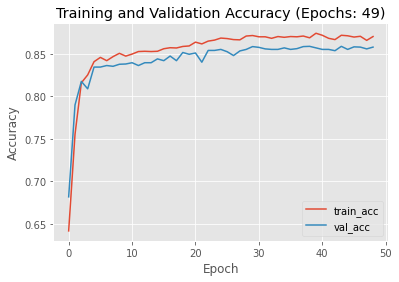

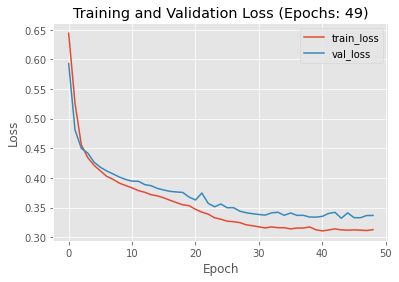

In [ ]:
model_3 = Sequential(name=f"model_3-tanh")

model_3.add(Dense(units=2,
                    input_dim=2,
                    activation="tanh"))

model_3.add(Dense(units=4,
                    activation="tanh"))

model_3.add(Dense(units=6,
                    activation="tanh"))

model_3.add(Dense(units=8,
                    activation="tanh"))

model_3.add(Dense(units=6,
                    activation="tanh"))

model_3.add(Dense(units=1,
                    activation="sigmoid"))

model_3.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

evaluate_model(model_3,
                epochs=100,
                train_tuple=(X_train, y_train),
                validation_tuple=(X_val, y_val),
                test_tuple = (X_test, y_test),
                callbacks=[EarlyStopping(monitor='val_loss',
                                        mode='min',
                                        verbose=1,
                                        patience=5)])

La matriz de confusión obtenida para el mejor modelo en el dataset de prueba es:

&nbsp;|Real 1|Real 0
:---:|:---:|:---:
Predicted 1|1345|304
Predicted 0|213|1463

Esta matriz nos indica la proporción de las clases reales vs. las clases predichas por el modelo. Dado esto, podemos inferir que la matriz muestra:

&nbsp;|Real P|Real N
:---:|:---:|:---:
Predicted P|TP|FN
Predicted N|FP|TN

Esta matriz es muy útil ya que nos permite calcular métricas como:

* $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$
    * Que nos dice qué tan exacto fue el modelo en sus predicciones.
* $Recall = \frac{TP}{TP + FN}$
    * Conocido también como la razón de verdaderos positivos
* $Precision = \frac{TP}{TP + FP}$
    * Conocido también como el valor predictivo positivo
* $F1 Score = \frac{2TP}{2TP + FP + FN}$
    * Que es la media armónica entre la Precisión y el recall

Estas métricas nos dan un panorama más completo del rendimiento de nuestro modelo que nos puede ayudar a identificar debilidades en el mismo.


